# Oxford Air Pollution Analysis

## Workflow

1) Retreive Data from URL's

2) Combine data into single dataframe

3) Graphs showing variations over the day / week / year

In [2]:
#import the necessary functions for the program
from urllib.request import urlretrieve
import pandas as pd
pd.options.display.float_format = '{:,.1f}'.format
import datetime
import matplotlib.pyplot as plt
import calendar as cal
plt.style.use('seaborn')
from reading_workflow.data import clean_data

In [3]:
#create datasets for each of the four available years
data_2020 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2020.csv')
data_2019 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2019.csv')
data_2018 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2018.csv')
data_2017 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2017.csv')
data_2016 = clean_data('https://uk-air.defra.gov.uk/data_files/site_data/OX_2016.csv')

(0, 224.48957322127208)

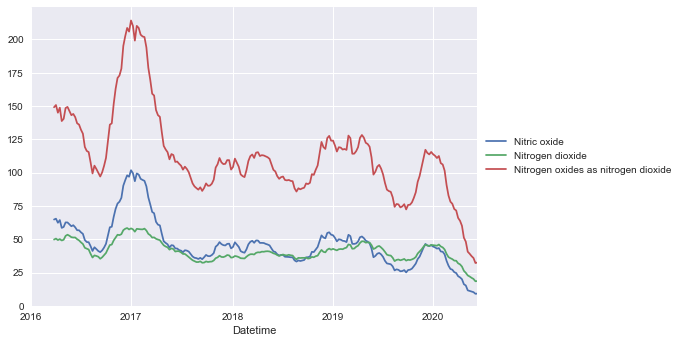

In [4]:
#concatenate all the years into a single dataset and plot the full timeline as a graph
data_total = pd.concat([data_2020,data_2019,data_2018,data_2017,data_2016]) #create a merged dataset of all the yearly data combined
plot = data_total.resample('W').mean().rolling(13).mean().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

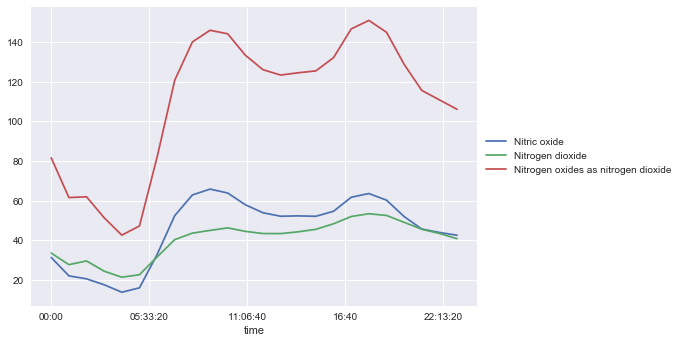

In [5]:
#plot the data by hour in the day
data_total.groupby(data_total.index.time).mean().plot()
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot

(0, 254.03598443939885)

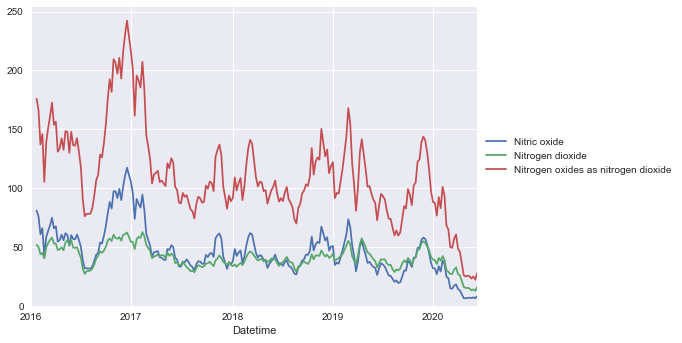

In [6]:
plot = data_total.resample('W').mean().rolling(4).mean().plot() #create a rolling average to remove spikes
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plot.set_ylim(0,None)

In [22]:
#Create new variables to represent the lockdown date
Lockdown = datetime.datetime(2020,3,17)
print("Lockdown began in the UK on week " + Lockdown.strftime("%V"))
data_total.loc[data_total.index>=Lockdown,'Lockdown']="Yes"
data_total.loc[data_total.index<Lockdown,'Lockdown']="No"
data_total.loc[data_total.index>datetime.datetime(2020,3,17),:]

Lockdown began in the UK on week 12


,Nitric oxide,Nitrogen dioxide,Nitrogen oxides as nitrogen dioxide,Weekday,Lockdown
Datetime,,,,,
2020-03-17 01:00:00,6.0,17.6,26.9,Tuesday,Yes
2020-03-17 02:00:00,3.8,15.4,21.3,Tuesday,Yes
2020-03-17 03:00:00,3.2,8.8,13.6,Tuesday,Yes
2020-03-17 04:00:00,2.9,8.2,12.6,Tuesday,Yes
2020-03-17 05:00:00,1.4,8.4,10.5,Tuesday,Yes
...,...,...,...,...,...
2020-06-12 20:00:00,29.4,62.2,107.3,Friday,Yes
2020-06-12 21:00:00,16.3,38.8,63.9,Friday,Yes
2020-06-12 22:00:00,15.0,30.2,53.2,Friday,Yes


Text(0.5, 0, 'Week')

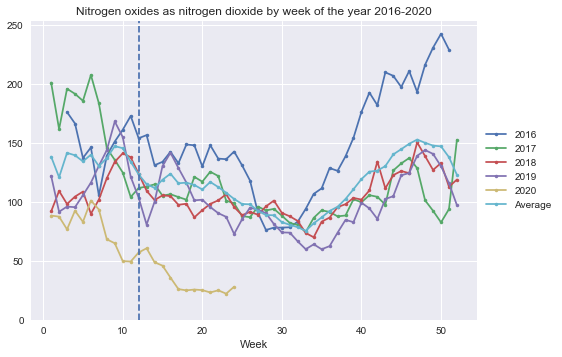

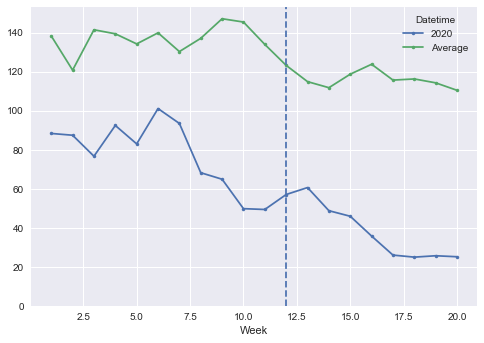

In [12]:
# plot the first 20 weeks of each of the available years graph of 'nitrogen oxides as nitrogen dioxide'
data_total_weekly = data_total.resample('W').mean().rolling(4).mean()
pivoted = data_total_weekly.pivot_table('Nitrogen oxides as nitrogen dioxide', 
                                        index=[data_total_daily.index.week], 
                                        columns=data_total_daily.index.year)

pivoted['Average'] = pivoted[[2016,2017,2018,2019]].mean(axis=1)
pivoted.style.format(",")
pivoted.iloc[0:150].plot(marker='.')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot
plt.xlabel('Week')
plt.title('Nitrogen oxides as nitrogen dioxide by week of the year 2016-2020')
plt.ylim(0)
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
pivoted[[2020,'Average']].iloc[0:20].plot(marker='.')
plt.ylim(0)
plt.axvline(x=12, linestyle='--', label='UK Lockdown begins 17/03/2020')
plt.xlabel('Week')

In [9]:
pivoted.head()

Datetime,2016,2017,2018,2019,2020,Average
Datetime,,,,,,
1,nan,201.0,91.7,122.0,88.3,138.3
2,nan,161.5,109.1,91.5,87.4,120.7
3,175.9,195.7,98.1,95.9,76.6,141.4
4,166.3,191.4,104.3,95.4,92.4,139.3
5,137.1,185.5,108.6,105.5,82.9,134.2


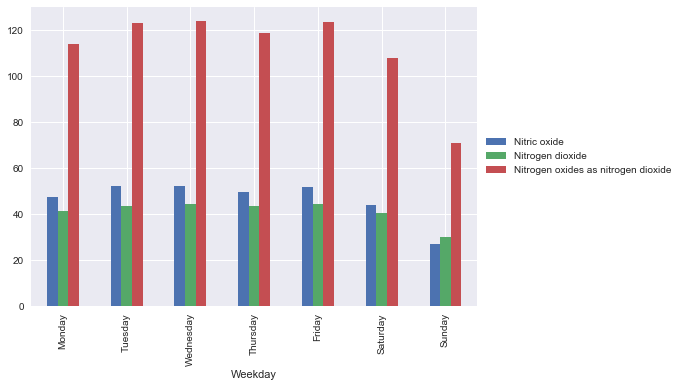

In [10]:
# resample the data to be daily by getting the average hourly reading
# 
data_total_daily = data_total.resample('d').mean()
data_total['Weekday'] = data_total.index.strftime('%A')
weekday = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
data_total_weekday = data_total.groupby('Weekday').mean().reindex(weekday).plot(kind='bar')
plt.legend(loc='center left',bbox_to_anchor=(1, 0.5)) #move the legend out of the plot